In [271]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [272]:
#Import dataset

df = pd.read_csv ('Dataset/nyc_jobs.csv')
df.head(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-23T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-23T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-23T00:00:00.000


In [273]:
#Data Exploration

df.shape

(3028, 28)

In [274]:
df.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,3028.000000,3028.000000,3028.000000,3028.000000,0.0
mean,369007.222919,2.563078,58857.313924,85933.670856,NaN
std,46660.609482,8.553471,27267.866514,44568.704420,NaN
min,87990.000000,1.000000,0.000000,10.360000,NaN
25%,368322.000000,1.000000,49390.000000,61800.000000,NaN
50%,387031.000000,1.000000,58162.000000,81535.000000,NaN
75%,396738.000000,1.000000,73305.000000,106222.000000,NaN
max,402195.000000,150.000000,218587.000000,234402.000000,NaN


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         3028 non-null   int64  
 1   Agency                         3028 non-null   object 
 2   Posting Type                   3028 non-null   object 
 3   # Of Positions                 3028 non-null   int64  
 4   Business Title                 3028 non-null   object 
 5   Civil Service Title            3028 non-null   object 
 6   Title Code No                  3028 non-null   object 
 7   Level                          3028 non-null   object 
 8   Job Category                   3026 non-null   object 
 9   Full-Time/Part-Time indicator  2779 non-null   object 
 10  Salary Range From              3028 non-null   float64
 11  Salary Range To                3028 non-null   float64
 12  Salary Frequency               3028 non-null   o

In [276]:
#Calculating Average salary and adding it as additional column


df = df.assign(avg_sal=df.loc[:,["Salary Range From","Salary Range To"]].mean(axis=1))

In [277]:
import numpy as np

df["avg_sal"]= np.where(df["Salary Frequency"]=="Daily", df["avg_sal"]*5*52, df["avg_sal"])
df["avg_sal"]= np.where(df["Salary Frequency"]=="Hourly", df["avg_sal"]*35*52, df["avg_sal"])

In [278]:
mean_sal = int(df["avg_sal"].mean())

In [279]:
mean_sal

77115

In [280]:
df["income"]= np.where(df["avg_sal"] <= mean_sal, 1, 0)

In [281]:
#Defining correlation matrix
df.corr()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact,avg_sal,income
Job ID,1.000000,-0.021469,0.034334,-0.005755,NaN,0.016219,0.025269
# Of Positions,-0.021469,1.000000,-0.183823,-0.187301,NaN,-0.128516,0.100031
Salary Range From,0.034334,-0.183823,1.000000,0.746735,NaN,0.728532,-0.528617
Salary Range To,-0.005755,-0.187301,0.746735,1.000000,NaN,0.847175,-0.652847
Recruitment Contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_sal,0.016219,-0.128516,0.728532,0.847175,NaN,1.000000,-0.766979
income,0.025269,0.100031,-0.528617,-0.652847,NaN,-0.766979,1.000000


In [282]:
#Job Id and # of positions having impact on income

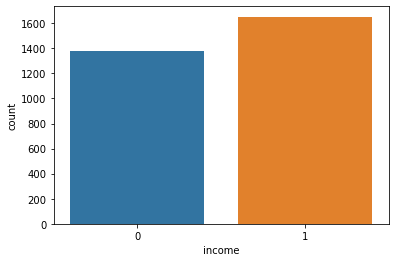

In [283]:
sns.countplot(x="income", data=df)
plt.savefig('unbalanced.png')

In [284]:
#Data that we are going predict are nearly balanced, since we derived the mean salary

In [285]:
df.income.value_counts()/df.shape[0]

1    0.545575
0    0.454425
Name: income, dtype: float64

In [286]:
df.income.value_counts()

1    1652
0    1376
Name: income, dtype: int64

In [287]:
#Going through each variable

C:\Users\Vijai\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


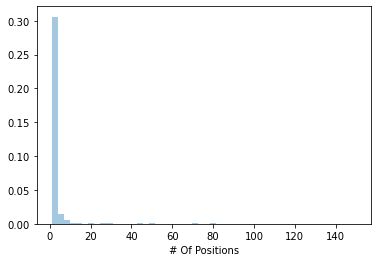

In [288]:
#Agency

sns.distplot(df['# Of Positions'])

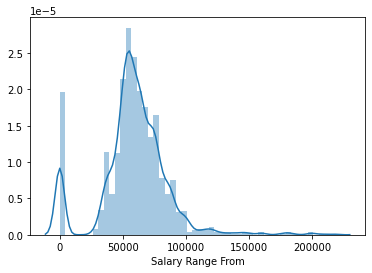

In [289]:
#Salary Range From

sns.distplot(df['Salary Range From'])

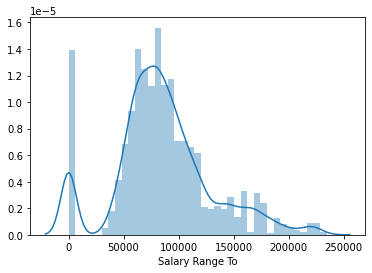

In [290]:
#Salary Range To

sns.distplot(df['Salary Range To'])

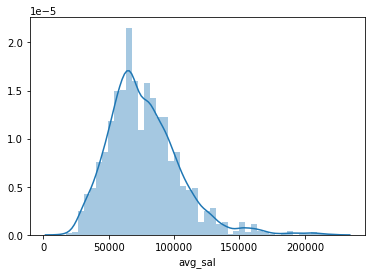

In [291]:
#Our calculated average salary

sns.distplot(df['avg_sal'])

In [292]:
#Encoding the dataframe to analyse features

In [ ]:
sns.kdeplot(df.age[df['avg_sal'] == 0],label = '<70k')
sns.kdeplot(df.age[df['avg_sal'] == 1],label = '>=70k')

In [293]:
df.groupby(['Civil Service Title', 'avg_sal'])['avg_sal'].count()

Civil Service Title             avg_sal
ACCOUNTANT                      46747.0     2
                                52411.5     2
                                57501.0     5
                                58571.5     4
                                63571.5     2
                                           ..
WATER USE INSPECTOR             52019.5     4
WATERSHED MAINTAINER            47033.5    16
                                49053.5     2
WIPER (UNIFORMED)               88400.0     1
WORKER'S COMPENSATION BENEFITS  45420.0     2
Name: avg_sal, Length: 1061, dtype: int64

In [294]:
#Dealing with missing values

In [295]:
df.isnull().sum().sort_values(ascending=False)

Recruitment Contact              3028
Post Until                       2177
Hours/Shift                      2092
Work Location 1                  1712
Additional Information           1148
Preferred Skills                  364
Full-Time/Part-Time indicator     249
Minimum Qual Requirements          12
Job Category                        2
To Apply                            1
Business Title                      0
# Of Positions                      0
Salary Range From                   0
Posting Type                        0
Agency                              0
Civil Service Title                 0
Title Code No                       0
Level                               0
income                              0
Division/Work Unit                  0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
avg_sal                             0
Job Description                     0
Residency Requirement               0
Posting Date

In [296]:
#Job ID

df['Job ID'].value_counts()

397604    3
381437    3
399226    3
401732    3
399204    3
         ..
401625    1
398520    1
400777    1
398728    1
347293    1
Name: Job ID, Length: 1691, dtype: int64

In [297]:
#Agency - Unique values

df['Agency'].value_counts()

DEPT OF ENVIRONMENT PROTECTION    680
DEPT OF HEALTH/MENTAL HYGIENE     275
DEPT OF DESIGN & CONSTRUCTION     229
NYC HOUSING AUTHORITY             222
DEPARTMENT OF TRANSPORTATION      152
DEPT OF INFO TECH & TELECOMM      134
HOUSING PRESERVATION & DVLPMNT    107
LAW DEPARTMENT                     96
ADMIN FOR CHILDREN'S SVCS          84
TAXI & LIMOUSINE COMMISSION        82
OFFICE OF THE COMPTROLLER          73
DEPARTMENT OF BUSINESS SERV.       71
DEPARTMENT OF INVESTIGATION        65
NYC EMPLOYEES RETIREMENT SYS       58
DEPT OF PARKS & RECREATION         55
OFFICE OF MANAGEMENT & BUDGET      50
DEPARTMENT OF CITY PLANNING        45
DEPARTMENT OF CORRECTION           42
HRA/DEPT OF SOCIAL SERVICES        40
POLICE DEPARTMENT                  39
FINANCIAL INFO SVCS AGENCY         36
DEPT OF CITYWIDE ADMIN SVCS        36
DEPT OF YOUTH & COMM DEV SRVS      33
OFFICE OF EMERGENCY MANAGEMENT     32
DEPARTMENT OF BUILDINGS            31
HUMAN RIGHTS COMMISSION            28
DEPARTMENT O

In [298]:
#Posting Type - Feature Balanced, Spread out across the dataset
df['Posting Type'].value_counts()

Internal    1715
External    1313
Name: Posting Type, dtype: int64

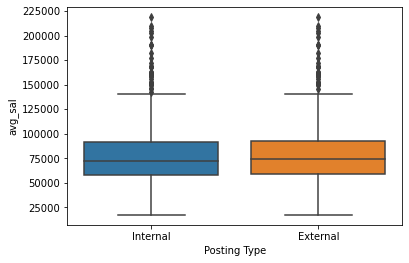

In [299]:
sns.boxplot(df['Posting Type'],df['avg_sal'])
plt.savefig('Posting Type.png')

In [300]:
## Of Positions - 

df['# Of Positions'].value_counts()

1      2377
2       300
3        83
4        66
5        48
8        24
7        14
6        13
20       11
10       10
15       10
9         9
30        8
80        8
50        6
11        5
45        4
70        4
25        4
150       3
16        2
19        2
12        2
24        2
100       2
28        2
52        2
62        2
75        2
13        1
29        1
49        1
Name: # Of Positions, dtype: int64

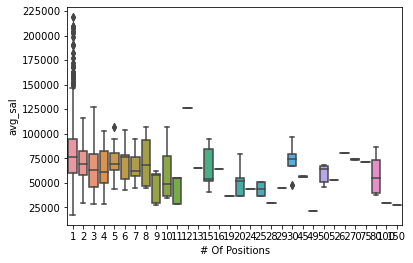

In [301]:
sns.boxplot(df['# Of Positions'],df['avg_sal'])
plt.savefig('# Of Positions.png')

In [302]:
#Business Title

df['Business Title'].value_counts()

Project Manager                                     32
ACCOUNTABLE MANAGER                                 26
Assistant Civil Engineer                            22
Engineering Technician I                            20
Director                                            18
                                                    ..
Senior Engineer (SharePoint)                         1
Assistant Director, Bureau of Early Intervention     1
Senior Supervising Attorney â€“Driver Protection     1
Security Administrator                               1
FMS Acceptance Coordinator                           1
Name: Business Title, Length: 1268, dtype: int64

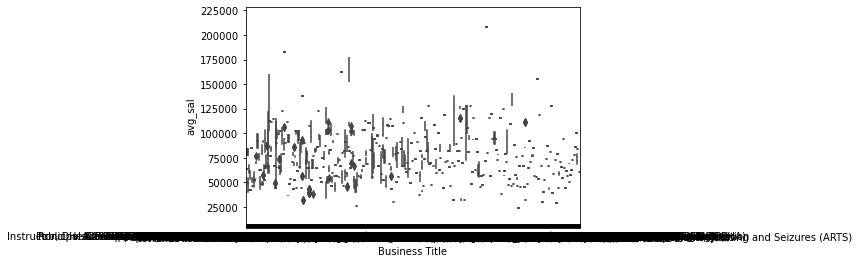

In [303]:
sns.boxplot(df['Business Title'],df['avg_sal'])
plt.savefig('Business Title.png')

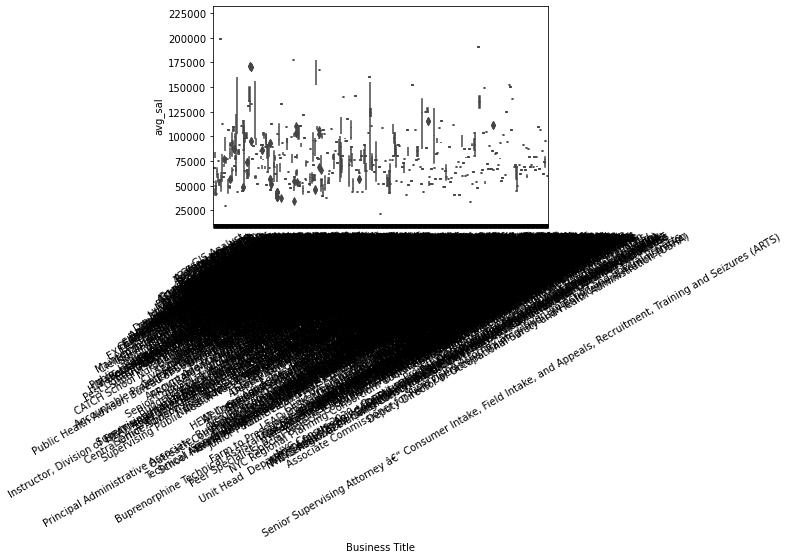

In [88]:
ax = sns.boxplot(df['Business Title'],df['avg_sal'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [304]:
#Civil Service Title - 

df['Civil Service Title'].value_counts()

COMMUNITY COORDINATOR             191
AGENCY ATTORNEY                   125
CIVIL ENGINEER                    111
ADMINISTRATIVE PROJECT MANAGER     82
CITY RESEARCH SCIENTIST            77
                                 ... 
COMPUTER SERVICE TECHNICIAN (C      1
SUPERVISING COMPUTER SERVICE T      1
HEALTH SERVICES MANAGER             1
ASSOCIATE QUALITY ASSURANCE SP      1
CHILD PROTECTIVE SPECIALIST (C      1
Name: Civil Service Title, Length: 325, dtype: int64

In [ ]:
#df_trans.groupby('Civil Service Title').avg_sal.mean().plot(kind='barh',figsize=(30, 400))



In [305]:
#Title Code No
df['Title Code No'].value_counts()

56058    191
30087    125
20215    111
21744     77
13632     64
        ... 
91915      1
31645      1
1005C      1
70314      1
10271      1
Name: Title Code No, Length: 339, dtype: int64

In [306]:
#Level -- As Level goes higher, salary increases. Important feature

df['Level'].value_counts()

0     1059
1      577
2      547
3      282
M1     160
M2     146
M3      86
4       45
M4      42
M5      37
M7      24
M6      11
1B       4
M8       2
1A       2
4A       2
4B       1
3B       1
Name: Level, dtype: int64

In [307]:
Level_sorted = (df['Level'].sort_values(ascending=True))
Level_sorted

1513     0
839      0
838      0
837      0
834      0
        ..
438     M7
439     M7
1776    M7
1215    M8
1216    M8
Name: Level, Length: 3028, dtype: object

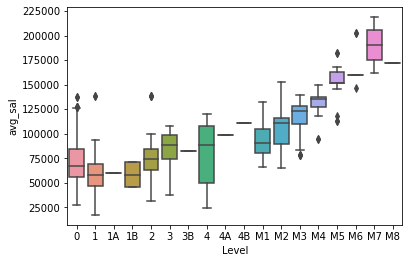

In [308]:
sns.boxplot(Level_sorted,df['avg_sal'])
plt.savefig('Level.png')

In [309]:
#Job Category
df['Job Category'].value_counts()

Engineering, Architecture, & Planning                                                                  510
Technology, Data & Innovation                                                                          323
Public Safety, Inspections, & Enforcement                                                              223
Legal Affairs                                                                                          206
Health                                                                                                 189
                                                                                                      ... 
Administration & Human Resources Finance, Accounting, & Procurement Social Services                      1
Clerical & Administrative Support Policy & Analysis                                                      1
Administration & Human Resources Legal Affairs Public Safety, Inspections, & Enforcement                 1
Constituent Services & Community Prog

In [310]:
#Full-Time/Part-Time indicator
df['Full-Time/Part-Time indicator'].value_counts()

F    2632
P     147
Name: Full-Time/Part-Time indicator, dtype: int64

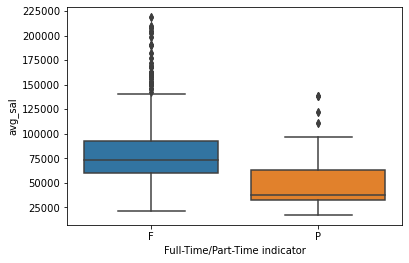

In [311]:
sns.boxplot(df['Full-Time/Part-Time indicator'],df['avg_sal'])
plt.savefig('Full_part.png')

In [312]:
#Salary Frequency
df['Salary Frequency'].value_counts()

Annual    2775
Hourly     224
Daily       29
Name: Salary Frequency, dtype: int64

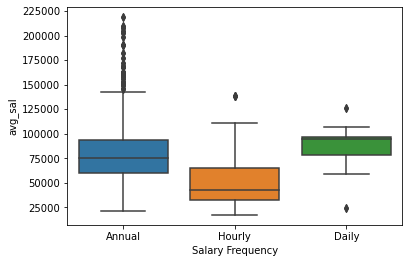

In [313]:
sns.boxplot(df['Salary Frequency'],df['avg_sal'])
plt.savefig('Salary Frequency.png')

In [314]:
#Division/Work Unit
df['Division/Work Unit'].value_counts()

Executive Management            60
Default                         39
Blue Belt Unit                  37
Citywide Cybersecurity          34
Administration                  33
                                ..
Deputy Comm Mgt & Budget Civ     1
Internal Audits & Discipline     1
Franchise Admin                  1
SYEP                             1
Finance Executive Office-NM      1
Name: Division/Work Unit, Length: 680, dtype: int64

In [315]:
#Posting Date
df['Posting Date'].value_counts()

2019-06-26T00:00:00.000    87
2019-07-19T00:00:00.000    80
2019-06-27T00:00:00.000    55
2019-06-28T00:00:00.000    53
2019-05-15T00:00:00.000    52
                           ..
2017-10-10T00:00:00.000     1
2019-03-08T00:00:00.000     1
2015-03-16T00:00:00.000     1
2015-02-19T00:00:00.000     1
2017-07-28T00:00:00.000     1
Name: Posting Date, Length: 473, dtype: int64

In [ ]:
#Residency Requirement

df['Residency Requirement'].value_counts()

In [321]:
df.loc[(df['Residency Requirement'].str.find('90') != -1),'Residency Requirement'] = 'NY Residency required within 90 days of appointment'
df.loc[(df['Residency Requirement'].str.find('ninety') != -1),'Residency Requirement'] = 'NY Residency required within 90 days of appointment'
df.loc[(df['Residency Requirement'].str.find('180') != -1),'Residency Requirement'] = 'NY Residency required within 180 days of appointment'

df.loc[(df['Residency Requirement'].str.find('is not required') != -1),'Residency Requirement'] = 'NR'
df.loc[(df['Residency Requirement'].str.find('has no residency') != -1),'Residency Requirement'] = 'NR'
df.loc[(df['Residency Requirement'].str.find('HAS NO RESIDENCY') != -1),'Residency Requirement'] = 'NR'
df.loc[(df['Residency Requirement'].str.find('has no Residency') != -1),'Residency Requirement'] = 'NR'
df.loc[(df['Residency Requirement'].str.find('exempt') != -1),'Residency Requirement'] = 'NR'
df.loc[(df['Residency Requirement'].str.find('waived') != -1),'Residency Requirement'] = 'NR'


df.loc[(df['Residency Requirement'].str.find('Must be a resident') != -1),'Residency Requirement'] = 'Must be a resident of NY'
df.loc[(df['Residency Requirement'].str.find('New York City residency required') != -1),'Residency Requirement'] = 'Must be a resident of NY'
df.loc[(df['Residency Requirement'].str.find('NYCHA has residency') != -1),'Residency Requirement'] = 'Must be a resident of NY'
df.loc[(df['Residency Requirement'].str.find('New York City Residency is required for this position') != -1),'Residency Requirement'] = 'Must be a resident of NY'
df.loc[(df['Residency Requirement'].str.find('NYCHA has on Residency') != -1),'Residency Requirement'] = 'Must be a resident of NY'
df.loc[(df['Residency Requirement'].str.find('NYC residency required') != -1),'Residency Requirement'] = 'Must be a resident of NY'


df.loc[(df['Residency Requirement'].str.find('must reside') != -1),'Residency Requirement'] = 'NR but must reside in NY'

In [322]:
df['Residency Requirement'].value_counts()

NY Residency required within 90 days of appointment     1775
NR                                                      1232
Must be a resident of NY                                  19
NY Residency required within 180 days of appointment       2
Name: Residency Requirement, dtype: int64

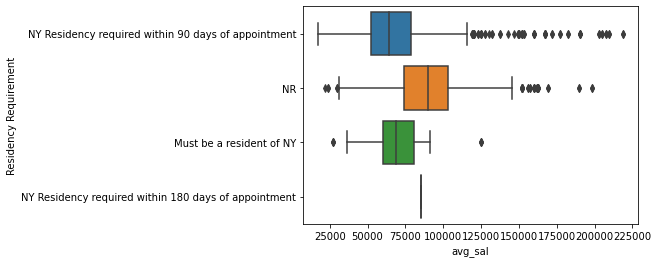

In [323]:
sns.boxplot(df['avg_sal'],df['Residency Requirement'])
plt.savefig('Residency Requirement.png')

In [147]:
#Dealing with missing values
import missingno as msno

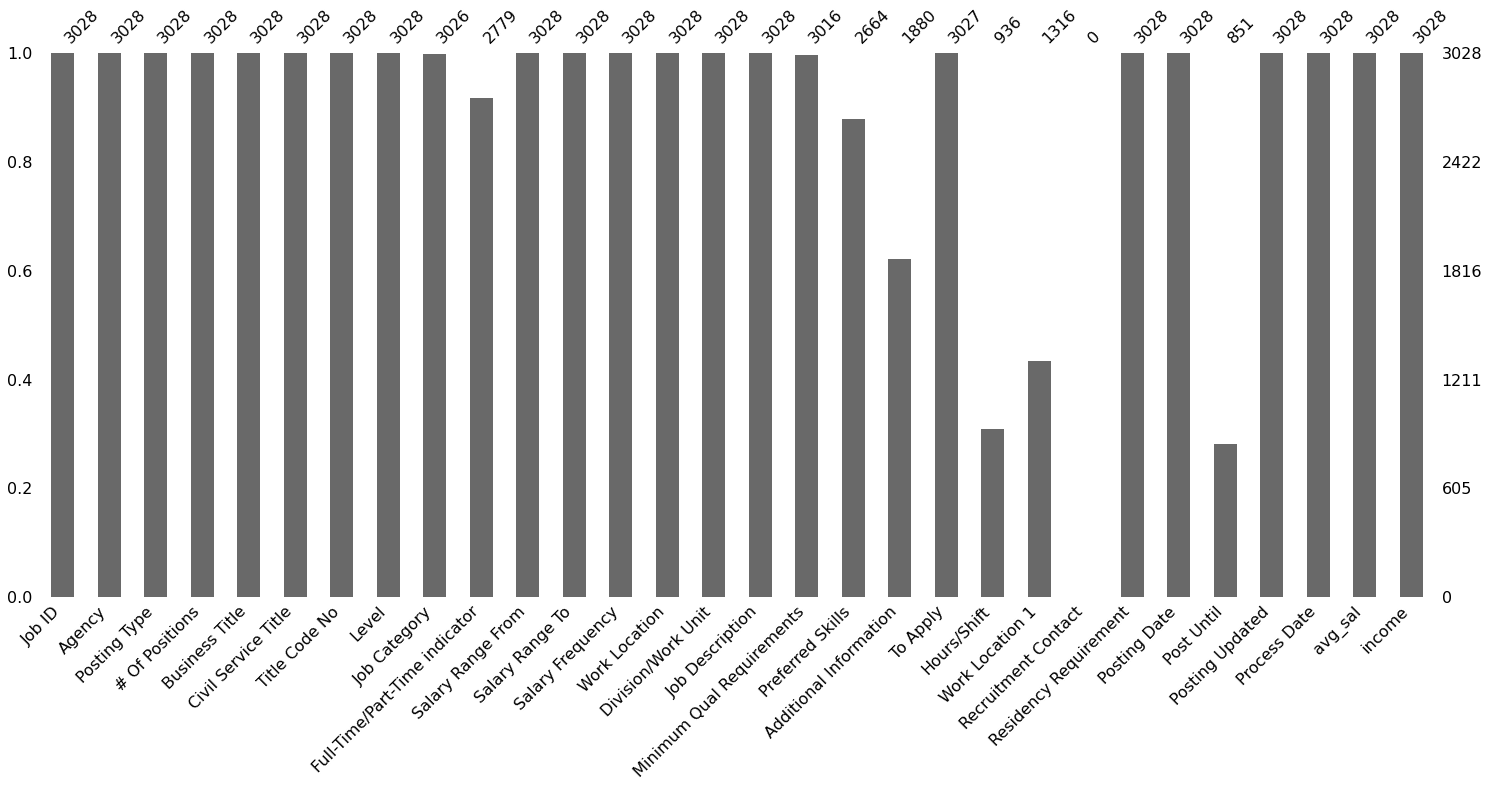

In [148]:
msno.bar(df)

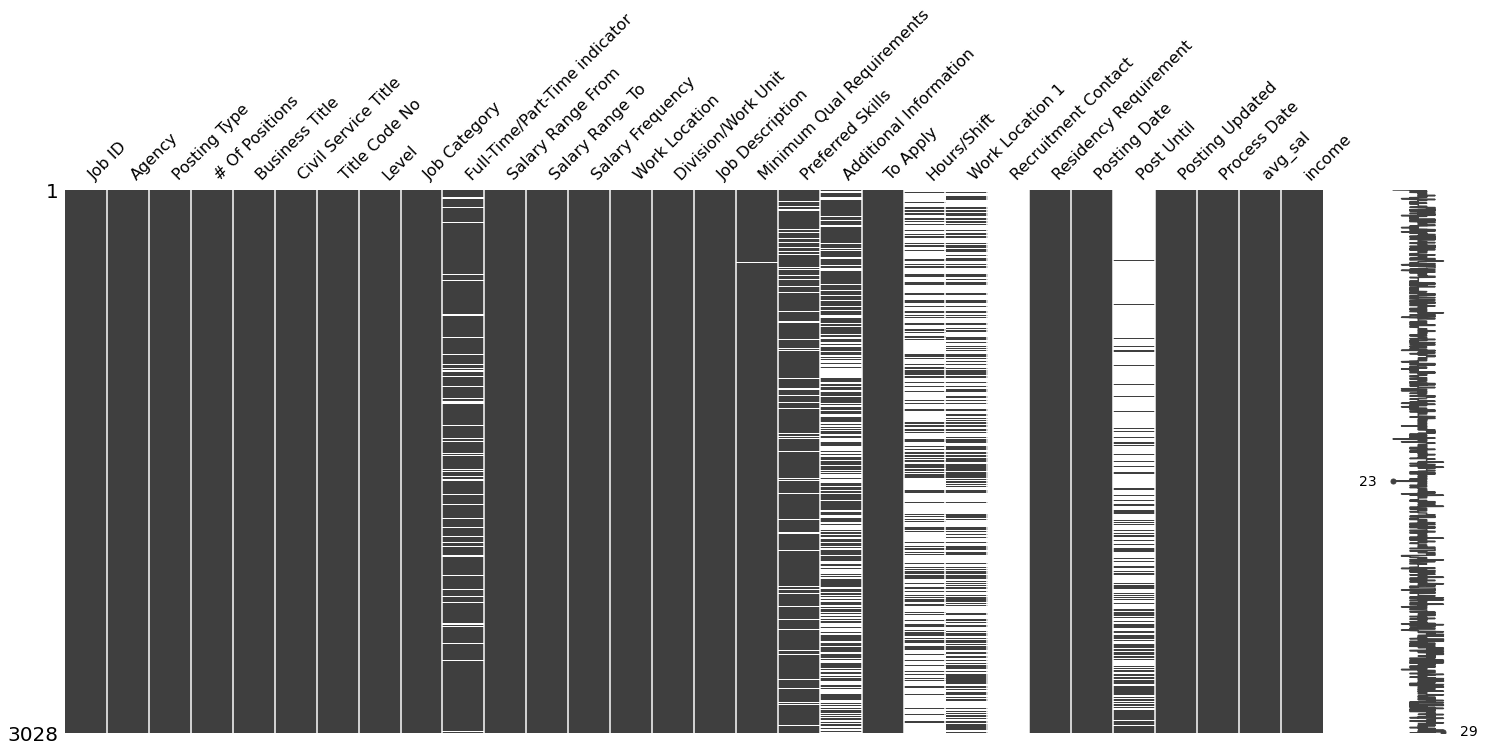

In [149]:
msno.matrix(df)

In [150]:
#Missing values do not follow any pattern or order

In [ ]:
#From the above matrix and Exploratory data analysis these columns does not affect the salary. So we are ignoring those columns

#Job ID
#Title Code No
#Work Location
#Job Description
#Minimum Qual Requirements
#Preferred Skills
#Additional Information
#To Apply
#Hours/Shift
#Work Location 1
#Recruitment Contact
#Posting Date
#Post Until
#Posting Updated
#Process Date


In [324]:
df_temp = df.drop(["Job ID","Title Code No","Work Location","Job Description","Minimum Qual Requirements",
                   "Preferred Skills","Additional Information","To Apply","Hours/Shift","Work Location 1","Recruitment Contact","Posting Date",
                   "Post Until","Posting Updated","Process Date"],axis=1)


In [325]:
df_temp.shape

(3028, 15)

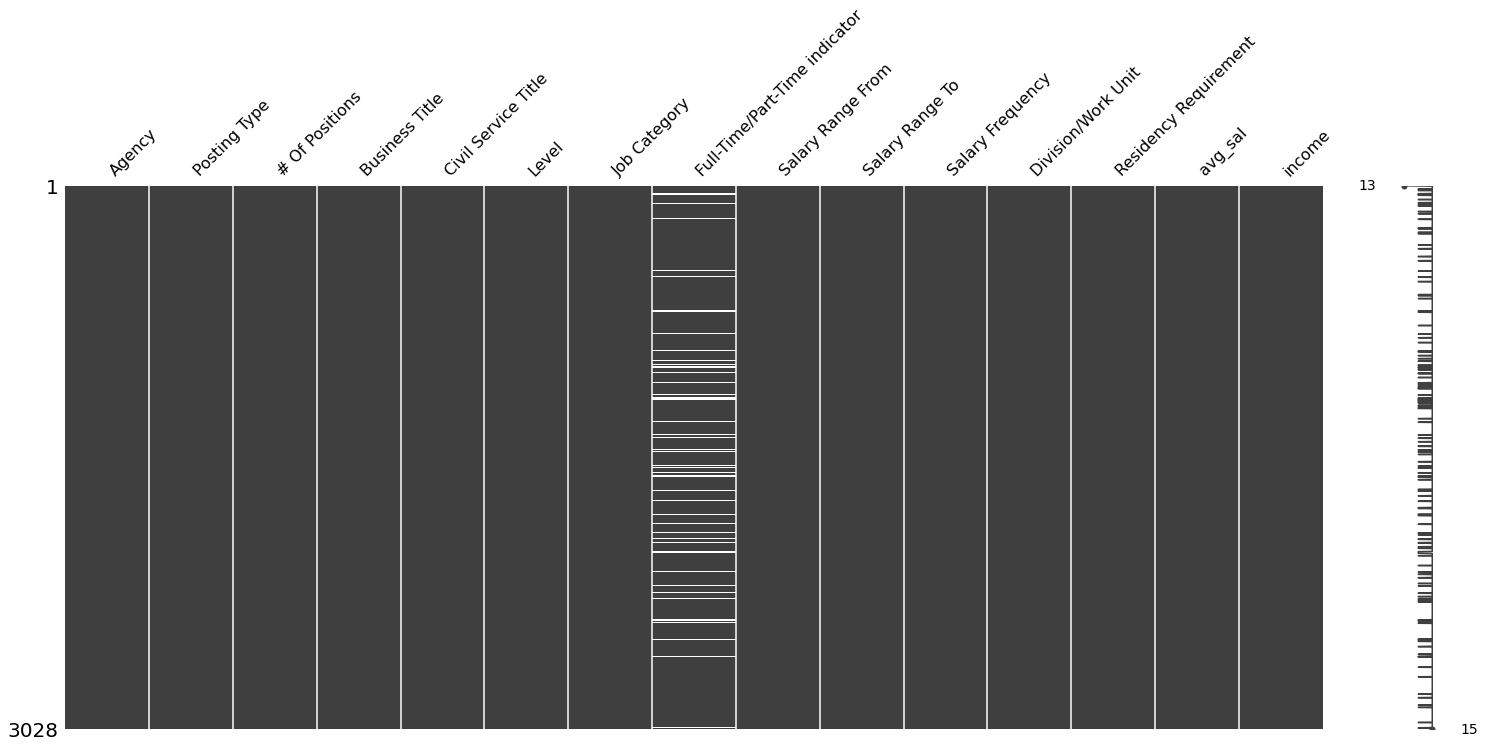

In [327]:
msno.matrix(df_temp)

In [329]:
#Handling missing values in Full-Time/Part-Time indicator

df_temp["Full-Time/Part-Time indicator"].value_counts()

F    2632
P     147
Name: Full-Time/Part-Time indicator, dtype: int64

In [342]:
df_temp.isnull().sum().sort_values(ascending=False)

Full-Time/Part-Time indicator    249
Job Category                       2
income                             0
avg_sal                            0
Residency Requirement              0
Division/Work Unit                 0
Salary Frequency                   0
Salary Range To                    0
Salary Range From                  0
Level                              0
Civil Service Title                0
Business Title                     0
# Of Positions                     0
Posting Type                       0
Agency                             0
dtype: int64

In [365]:
df_temp = df_temp[df_temp["Job Category"]!="N"]

In [354]:
df_temp = df_temp.replace(np.nan,"N", regex=True)

In [355]:
df_temp.isnull().sum().sort_values(ascending=False)

income                           0
avg_sal                          0
Residency Requirement            0
Division/Work Unit               0
Salary Frequency                 0
Salary Range To                  0
Salary Range From                0
Full-Time/Part-Time indicator    0
Job Category                     0
Level                            0
Civil Service Title              0
Business Title                   0
# Of Positions                   0
Posting Type                     0
Agency                           0
dtype: int64

In [357]:
#Full-Time/Part-Time indicator
df_temp['Full-Time/Part-Time indicator'].value_counts()

F    2632
N     249
P     147
Name: Full-Time/Part-Time indicator, dtype: int64

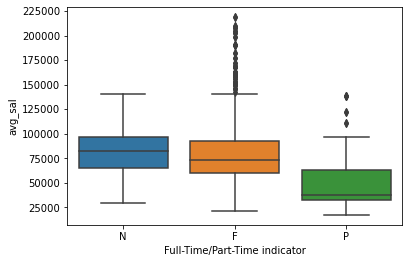

In [358]:
sns.boxplot(df_temp['Full-Time/Part-Time indicator'],df_temp['avg_sal'])
plt.savefig('Full_part.png')

In [359]:
#replacing "N" with "F" since most of the values fall under F category

df_temp = df_temp.replace("N","F", regex=True)

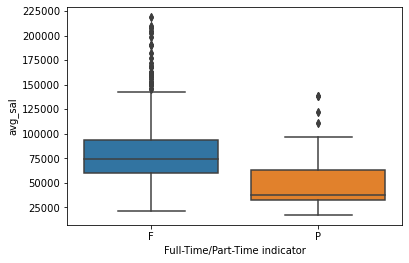

In [360]:
sns.boxplot(df_temp['Full-Time/Part-Time indicator'],df_temp['avg_sal'])
plt.savefig('Full_part.png')

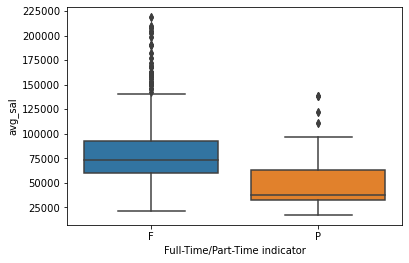

In [361]:
sns.boxplot(df['Full-Time/Part-Time indicator'],df_temp['avg_sal'])
plt.savefig('Full_part.png')

In [366]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3028 entries, 0 to 3027
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Agency                         3028 non-null   object 
 1   Posting Type                   3028 non-null   object 
 2   # Of Positions                 3028 non-null   int64  
 3   Business Title                 3028 non-null   object 
 4   Civil Service Title            3028 non-null   object 
 5   Level                          3028 non-null   object 
 6   Job Category                   3028 non-null   object 
 7   Full-Time/Part-Time indicator  3028 non-null   object 
 8   Salary Range From              3028 non-null   float64
 9   Salary Range To                3028 non-null   float64
 10  Salary Frequency               3028 non-null   object 
 11  Division/Work Unit             3028 non-null   object 
 12  Residency Requirement          3028 non-null   o

In [363]:
#Categorical Encoding

def ordinal_encoding(st):
    dicts = {}
    values = range(len(st))
    keys = list(st)
    n= 0
    for i in keys:
        if n <= len(st):
            dicts[i] = n
            n = n+1
    return dicts

In [481]:
#constant variables
Agency_mapping = ordinal_encoding(set(df_temp["Agency"]))
Posting_type_mapping = ordinal_encoding(set(df_temp["Posting Type"]))
Business_title_mapping = ordinal_encoding(set(df_temp["Business Title"]))
Civil_service_title_mapping = ordinal_encoding(set(df_temp["Civil Service Title"]))
Level_mapping = ordinal_encoding(set(df_temp["Level"]))
Job_category_mapping = ordinal_encoding(set(df_temp["Job Category"]))
Full_part_mapping = ordinal_encoding(set(df_temp["Full-Time/Part-Time indicator"]))
Salary_frequency_mapping = ordinal_encoding(set(df_temp["Salary Frequency"]))
Division_unit_mapping = ordinal_encoding(set(df_temp["Division/Work Unit"]))
residency_mapping = ordinal_encoding(set(df_temp["Residency Requirement"]))


In [368]:
import category_encoders as ce

In [369]:
# create object of Ordinalencoding

encoder= ce.OrdinalEncoder(cols=['Agency','Posting Type','Business Title','Civil Service Title','Level','Job Category','Full-Time/Part-Time indicator','Salary Frequency','Division/Work Unit','Residency Requirement'],return_df=True,
                           mapping=[{'col':'Agency','mapping':Agency_mapping},
                                    {'col':'Posting Type','mapping':Posting_type_mapping},
                                    {'col':'Business Title','mapping':Business_title_mapping},
                                    {'col':'Civil Service Title','mapping':Civil_service_title_mapping},
                                    {'col':'Level','mapping':Level_mapping},
                                    {'col':'Job Category','mapping':Job_category_mapping},
                                    {'col':'Full-Time/Part-Time indicator','mapping':Full_part_mapping},
                                    {'col':'Salary Frequency','mapping':Salary_frequency_mapping},
                                    {'col':'Division/Work Unit','mapping':Division_unit_mapping},
                                    {'col':'Residency Requirement','mapping':residency_mapping}])

In [370]:
df_trans = encoder.fit_transform(df_temp)

In [371]:
df_trans.head(3)

,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Division/Work Unit,Residency Requirement,avg_sal,income
0,38,0,1,82,220,16,39,1,42405.00,65485.00,2,63,1,53945.0,1
1,38,0,1,541,105,0,39,1,60740.00,162014.00,2,667,1,111377.0,0
2,33,1,52,386,140,13,65,1,51907.68,54580.32,2,157,0,53244.0,1


,sumsquare_error,aic,bic,kl_div
chi2,5.706138e-10,2837.609038,-88696.250479,inf
gamma,6.829788e-10,2896.325072,-88151.963966,inf
norm,6.874034e-10,2895.712633,-88140.426089,inf
cauchy,9.393639e-10,2647.610204,-87194.837254,inf
expon,3.603454e-09,2540.371732,-83123.857180,inf


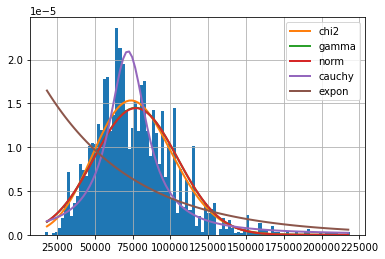

In [378]:
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df_trans["avg_sal"],
           distributions= get_common_distributions())
f.fit()
f.summary()

In [379]:
f.get_best(method = 'sumsquare_error')

{'chi2': {'df': 139.298423775149,
  'loc': -141356.12303339498,
  'scale': 1567.9922717027366}}

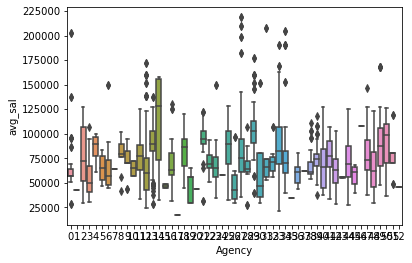

In [381]:
sns.boxplot(df_trans['Agency'],df_trans['avg_sal'])

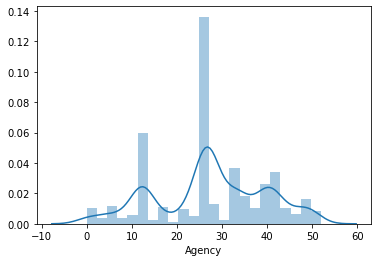

In [382]:
sns.distplot(df_trans['Agency'])

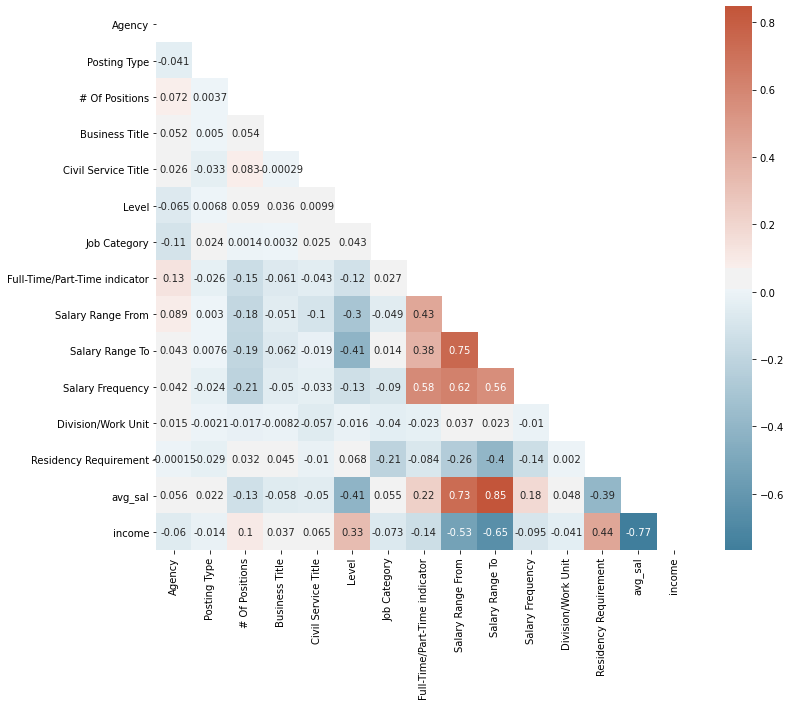

In [385]:
#Checking correlation

corr = df_trans.corr()
fig, ax = plt.subplots(figsize=(12,10))  
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
#Strong correlated variables :

# 1. Salary Range from & Salary Range To ---> Deleting Salary range To column
# 2. Avg_sal and Salary Range To  -->
# 3. avg_sal and Salary Range From  --> Deleting Salary Range From column

In [391]:
df_trans = df_trans.drop(["Salary Range To","Salary Range From"],axis=1)

In [392]:
#Variable Selection

df_trans.corr()['income'].sort_values()

avg_sal                         -0.766979
Full-Time/Part-Time indicator   -0.138259
Salary Frequency                -0.095090
Job Category                    -0.073337
Agency                          -0.060494
Division/Work Unit              -0.041224
Posting Type                    -0.013838
Business Title                   0.036951
Civil Service Title              0.065018
# Of Positions                   0.100031
Level                            0.325742
Residency Requirement            0.438309
income                           1.000000
Name: income, dtype: float64

In [419]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_trans.drop('income',axis = 1), df_trans['income'], test_size=0.33, random_state=42)
                                            

In [420]:
#Feature selection

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

X = X_train.values
y = y_train.values

model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)
feat_selector.fit(X, y)
feat_selector.support_
feat_selector.ranking_
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	1
Itera

In [421]:
sum(feat_selector.support_)

11

In [422]:
#Posting Type  column is ignored with feature selection
X_train.columns[feat_selector.support_]

Index(['Agency', '# Of Positions', 'Business Title', 'Civil Service Title',
       'Level', 'Job Category', 'Full-Time/Part-Time indicator',
       'Salary Frequency', 'Division/Work Unit', 'Residency Requirement',
       'avg_sal'],
      dtype='object')

In [423]:
X_train.columns[feat_selector.ranking_]

Index(['Posting Type', '# Of Positions', 'Posting Type', 'Posting Type',
       'Posting Type', 'Posting Type', 'Posting Type', 'Posting Type',
       'Posting Type', 'Posting Type', 'Posting Type', 'Posting Type'],
      dtype='object')

In [544]:
X_filtered.shape

(2028, 11)

In [425]:
#Dimensionality Reduction -  PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=2)
pca.fit(X_train)
pca_x_train=pca.fit_transform(X_train)
pd_pca_x_train = pd.DataFrame(pca_x_train,columns=['a','b'])
pd_pca_x_train['c'] = y_train

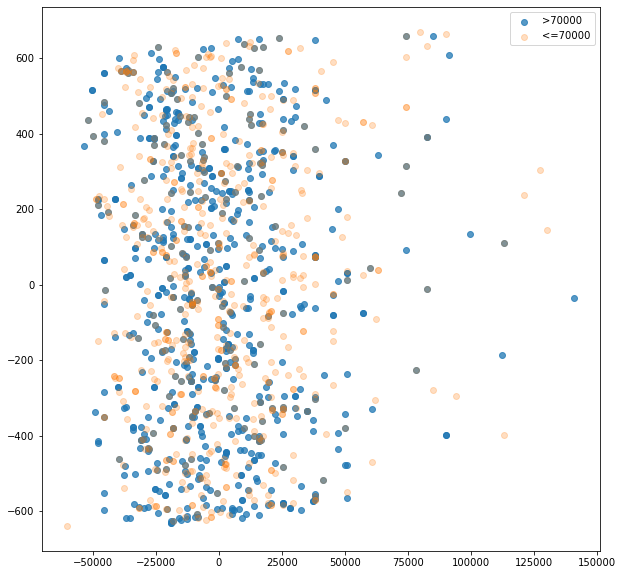

In [426]:
plt.subplots(figsize=(10, 10))
plt.scatter(x = 'a',y = 'b',data = pd_pca_x_train[pd_pca_x_train['c']==1],alpha = .75,label = '>70000')
plt.scatter(x = 'a',y = 'b',data = pd_pca_x_train[pd_pca_x_train['c']==0],alpha = .25,label = '<=70000')
plt.legend()

In [427]:
#Data overlapped signifies that there are more than one dependent variable

In [428]:
from sklearn.linear_model import LogisticRegression

In [429]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Vijai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [430]:
test_predicted = clf.predict(X_test)

In [431]:
from sklearn import metrics
from sklearn.metrics import classification_report
metrics.accuracy_score(y_test,test_predicted)

0.805

In [432]:
metrics.f1_score(y_test,test_predicted)

0.8202764976958525

In [433]:
print(classification_report(y_test, test_predicted))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       436
           1       0.85      0.79      0.82       564

    accuracy                           0.81      1000
   macro avg       0.80      0.81      0.80      1000
weighted avg       0.81      0.81      0.81      1000



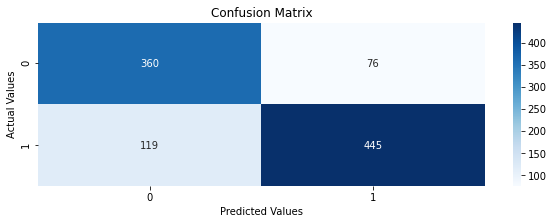

In [552]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,test_predicted)
plt.figure(figsize=(10,3))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [ ]:
#include Decion Tree Data --- Kirutika

In [531]:
#Training and Test Data
from sklearn.model_selection import train_test_split
X_traind, X_testd, y_traind, y_testd = train_test_split(df_trans.drop(['income'],axis = 1), df_trans['income'], test_size=0.20, random_state=0)
                                            

In [482]:
df_trans.columns

Index(['Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Frequency',
       'Division/Work Unit', 'Residency Requirement', 'avg_sal', 'income'],
      dtype='object')

In [494]:
df_dt = df_trans.drop(['Agency','Business Title','Posting Type','# Of Positions','Job Category'],axis = 1)

In [515]:
x_data = df_dt.drop(['income'],axis = 1)
y_data = df_dt['income']

In [535]:
y_data.value_counts()

1    1652
0    1376
Name: income, dtype: int64

In [519]:
X_traind, X_testd, y_traind, y_testd = train_test_split(x_data, y_data, test_size=0.30, random_state=1)

In [537]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=1234)

In [538]:
dt.fit(X_traind, y_traind)
dt_prediction = dt.predict(X_testd)

In [436]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       1.00      1.00      1.00       564

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [411]:
#Hyper Tuning Parameters

def combined(X_train, y_train,X_test,y_test,support,model,tuning_parameters):
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report,accuracy_score,f1_score

    X_train = X_train.loc[:,support].values
    X_test = X_test.loc[:,support].values
    y_train = y_train.values
    y_test = y_test.values

    scores = ['accuracy','precision', 'recall','f1']
    
    for score in scores:
        print("# Tuning Hyper-Parameters For %s" % score)
        print()

        clf = GridSearchCV(model, tuning_parameters, cv=5,
                           scoring=score)
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print('Accuracy: '+str(accuracy_score(y_true,y_pred)))
        print('f1 score: '+str(f1_score(y_true,y_pred)))
        print()
        print()
    return clf

In [463]:
from sklearn.ensemble import GradientBoostingClassifier
tuning_parameters_gb = [{'loss': ['deviance','exponential'],'learning_rate':[.1,.01,.001],'n_estimators':[100,500,1000] }]

In [ ]:
gb = combined(X_train, y_train,X_test,y_test,feat_selector.support_,GradientBoostingClassifier(),tuning_parameters_gb)


In [459]:
from sklearn.ensemble import RandomForestClassifier
tuning_parameters_rf = [{'max_depth': [1,2,3,4,5,7,10,28],'min_samples_leaf':[10,50,100,500] }]

In [460]:
rf = combined(X_train, y_train,X_test,y_test,feat_selector.support_,RandomForestClassifier(),tuning_parameters_rf)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'max_depth': 1, 'min_samples_leaf': 10}

Grid scores on development set:

1.000 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 10}
1.000 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 50}
1.000 (+/-0.000) for {'max_depth': 1, 'min_samples_leaf': 100}
0.979 (+/-0.020) for {'max_depth': 1, 'min_samples_leaf': 500}
1.000 (+/-0.000) for {'max_depth': 2, 'min_samples_leaf': 10}
1.000 (+/-0.000) for {'max_depth': 2, 'min_samples_leaf': 50}
1.000 (+/-0.000) for {'max_depth': 2, 'min_samples_leaf': 100}
0.980 (+/-0.022) for {'max_depth': 2, 'min_samples_leaf': 500}
1.000 (+/-0.000) for {'max_depth': 3, 'min_samples_leaf': 10}
1.000 (+/-0.000) for {'max_depth': 3, 'min_samples_leaf': 50}
1.000 (+/-0.000) for {'max_depth': 3, 'min_samples_leaf': 100}
0.981 (+/-0.021) for {'max_depth': 3, 'min_samples_leaf': 500}
1.000 (+/-0.000) for {'max_depth': 4, 'min_samples_leaf': 10}
1.000 (+/-0.000) for {'max

In [ ]:
#######################3

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [465]:
sum(y_train)

1088

In [466]:
len(y_train)

2028

In [467]:
#Oversampling

nrow = np.random.choice(len(y_train), sum(y_train==1),replace=False)

In [468]:
X_train_oversample = pd.DataFrame(X_train)

In [469]:
X_train_oversample = X_train_oversample.append(X_train.loc[y_train==1])


In [470]:
X_train_oversample = X_train_oversample.append(X_train.loc[y_train==1])


In [471]:
X_train_oversample = X_train_oversample.append(X_train.loc[y_train==1])


In [472]:
X_train_oversample.shape


(5292, 12)

In [473]:
y_train_oversample = y_train


In [474]:
y_train_oversample = y_train_oversample.append(y_train[y_train==1])


In [475]:
y_train_oversample = y_train_oversample.append(y_train[y_train==1])


In [476]:
y_train_oversample = y_train_oversample.append(y_train[y_train==1])


In [477]:
y_train_oversample.shape


(5292,)

In [480]:
tuning_parameters_svm = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                      'C': [ 10, 100, 1000] },
                    {'kernel': ['linear'], 'C': [ 10, 100, 1000]}]
from sklearn.svm import SVC
svm = combined(X_train, y_train,X_test,y_test,feat_selector.support_,SVC(),tuning_parameters_svm)
svm_ovr = combined(X_train_oversample, y_train_oversample,X_test,y_test,feat_selector.support_,SVC(),tuning_parameters_svm)

# TUNING HYPER-PARAMETERS FOR accuracy

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.780 (+/-0.027) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.837 (+/-0.023) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.780 (+/-0.027) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.837 (+/-0.023) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.780 (+/-0.027) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.837 (+/-0.023) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 100, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       1.00      1.00      1.00       564
